<a href="https://colab.research.google.com/github/bomiiisong/DeepLearning-with-Python/blob/master/CNN/VGG16_FeatureExtraction_Dogs_and_Cats_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 학습된 CNN(VGG-16)을 이용한 Feature Extraction

## VGG-16 Model

* 케라스 창시자에게 배우는 딥러닝(p.204~)
* University of Oxford - Visual Geometry Group
* 2014 ILSVRC 2nd Model
* ImageNet Large Scale Visual Recognition Challenge (ILSVRC)

## Import Keras

In [ ]:
import keras

keras.__version__

'2.4.3'

## I. Google Drive Mount

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


> ### 1) 구글 드라이브 마운트 결과 확인

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  4 04:51 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


> ### 2) unzip 'dogs_and_cats_small.zip'

In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [ ]:
!ls -l

total 20
drwx------ 5 root root 4096 Mar 24 04:54 drive
drwxr-xr-x 1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 4 root root 4096 Mar 24 04:55 test
drwxr-xr-x 4 root root 4096 Mar 24 04:55 train
drwxr-xr-x 4 root root 4096 Mar 24 04:55 validation


## II. Image_File Directory Setting

In [ ]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

## III. Import VGG-16 Model

> ### 1) conv_base

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


* Model Summary

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## IV. Feature Extraction

> ### 1) 특징 추출 함수 정의 : extract_feature( )

* conv_base.predict()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

data_gen = ImageDataGenerator(rescale=1./255)

batch_size=20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))

    generator = data_gen.flow_from_directory(directory, target_size=(150, 150),
                                             batch_size=batch_size,
                                             class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

> ### 2) 특징 추출 함수 적용

In [ ]:
%%time

train_features, train_labels = extract_features(train_dir, 2000)
valid_features, valid_labels = extract_features(valid_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
CPU times: user 24.3 s, sys: 4.48 s, total: 28.8 s
Wall time: 56.4 s


In [ ]:
train_features.shape, valid_features.shape, test_features.shape

((2000, 4, 4, 512), (1000, 4, 4, 512), (1000, 4, 4, 512))

> ### 3) Reshape Features

* For 'Classification' Network

In [ ]:
train_features = np.reshape(train_features, (2000, 4*4*512))
valid_features = np.reshape(valid_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

train_features.shape, valid_features.shape, test_features.shape

((2000, 8192), (1000, 8192), (1000, 8192))

## V. Keras CNN Modeling with VGG-16 Featured Data

> ### 1) Model Define

* 'Classification' Network only
* Dropout Layer

In [ ]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


> ### 2) Model Compile

* 모델 학습 방법 설정

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

> ### 3) Model Fit

In [ ]:
%%time
Hist_dandc = model.fit(train_features, train_labels,
                       epochs = 100, batch_size = 20,
                       validation_data = (valid_features, valid_labels))

Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 0.8761 - accuracy: 0.6789 - val_loss: 0.2773 - val_accuracy: 0.8910
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2594 - accuracy: 0.8968 - val_loss: 0.2612 - val_accuracy: 0.9020
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.9216 - val_loss: 0.2359 - val_accuracy: 0.9000
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1541 - accuracy: 0.9391 - val_loss: 0.2330 - val_accuracy: 0.9050
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1444 - accuracy: 0.9340 - val_loss: 0.2392 - val_accuracy: 0.9080
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.0956 - accuracy: 0.9668 - val_loss: 0.2753 - val_accuracy: 0.8950
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1244 - accuracy: 0.9515 - val_loss: 0.3215 - val_accuracy: 0.8790

> ### 4) 학습 결과 시각화

* Loss Visualization

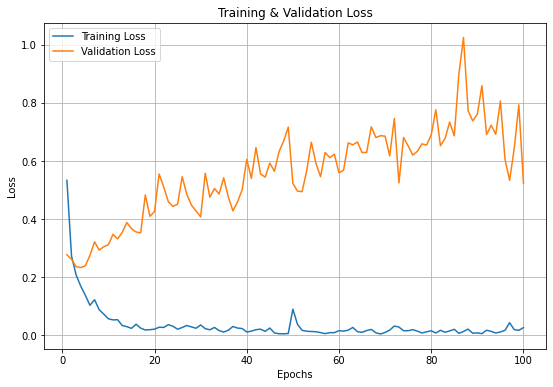

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

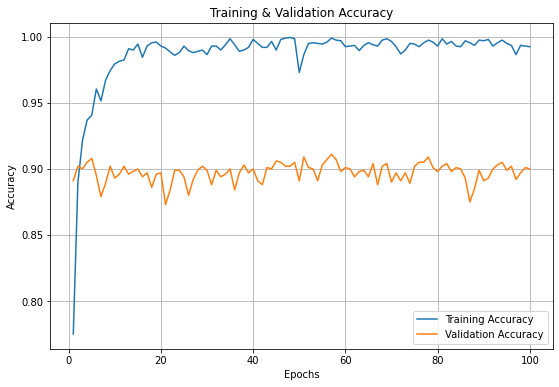

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ### 5) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(test_features, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

32/32 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.8860
Loss = 0.61158
Accuracy = 0.88600


## IV. Model Save & Load to Google Drive

> ### 1) Google Drive Mount

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> ### 2) Model Save

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/004_dogs_and_cats_feature_extraction.h5')

In [ ]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 146382
-rw------- 1 root root    34592 Mar 17 07:31 001_Model_iris.h5
-rw------- 1 root root 41499744 Mar 23 06:47 002_dogs_and_cats_Augmentation.h5
-rw------- 1 root root 41498896 Mar 23 02:16 002_dogs_and_cats_small.h5
-rw------- 1 root root 25199032 Mar 24 05:15 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 41661328 Mar 23 06:45 201_CNN_Logo_Augmentation.h5


> ### 3) Model Load

In [ ]:
from keras.models import load_model
model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/004_dogs_and_cats_feature_extraction.h5')

In [ ]:
loss, accuracy = model_google.evaluate(test_features, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

32/32 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.8860
Loss = 0.61158
Accuracy = 0.88600
